In [36]:
import numpy as np
import torch
import pickle
complete_mapping   = {4: 0, 30: 1, 55: 2, 72: 3, 95: 4, 1: 5, 32: 6, 67: 7, 73: 8, 91: 9, 54: 10, 62: 11, 70: 12, 82: 13, 92: 14, 47: 15, 52: 16, 56: 17, 59: 18, 96: 19, 0: 20, 51: 21, 53: 22, 57: 23, 83: 24, 9: 25, 10: 26, 16: 27, 28: 28, 61: 29, 22: 30, 39: 31, 40: 32, 86: 33, 87: 34, 5: 35, 20: 36, 25: 37, 84: 38, 94: 39, 6: 40, 7: 41, 14: 42, 18: 43, 24: 44, 26: 45, 45: 46, 77: 47, 79: 48, 99: 49, 23: 50, 33: 51, 49: 52, 60: 53, 71: 54, 12: 55, 17: 56, 37: 57, 68: 58, 76: 59, 3: 60, 42: 61, 43: 62, 88: 63, 97: 64, 15: 65, 19: 66, 21: 67, 31: 68, 38: 69, 34: 70, 63: 71, 64: 72, 66: 73, 75: 74, 36: 75, 50: 76, 65: 77, 74: 78, 80: 79, 8: 80, 13: 81, 48: 82, 58: 83, 90: 84, 41: 85, 69: 86, 81: 87, 85: 88, 89: 89, 2: 90, 11: 91, 35: 92, 46: 93, 98: 94, 27: 95, 29: 96, 44: 97, 78: 98, 93: 99}

with open('embeddings_all_finetuned_10.pkl', 'rb') as file:
    data = pickle.load(file)

X = data['outputs']
y = data['labels']

In [37]:
print(X.shape)


torch.Size([49984, 100])


In [38]:
print(y)

tensor([19, 29,  0,  ..., 12, 94, 89])


In [28]:
# take the embeddings where the corresponding label is 1

only_1 = X[y == 1]

# zero mean and unit variance

mean = np.mean(only_1.detach().numpy(), axis=0)
std = np.std(only_1.detach().numpy(), axis=0)

norm = (only_1.detach().numpy() - mean) / std

print(norm)

[[ 1.3405339   1.8173052   1.0607195  ...  0.70943224  0.34936297
   0.97163916]
 [-0.7748689  -1.6658752  -0.14059846 ...  0.13439974  0.18825567
   0.09409059]
 [-0.18314143  1.1368911   0.16487414 ... -0.4942376  -0.08507713
   0.09801594]
 ...
 [ 0.44044375 -1.0102172  -0.17001271 ...  3.7020988   2.245652
   1.2413977 ]
 [-0.870353    2.6530004   1.0224955  ...  0.73156106  1.0834237
   2.0837004 ]
 [-0.7415443   1.4413893  -0.3582654  ...  0.1042431   0.8323459
   0.94046926]]


In [40]:
# for every embedding, plot it in 2D

a = norm[0, :]
print(a.shape)

(100,)


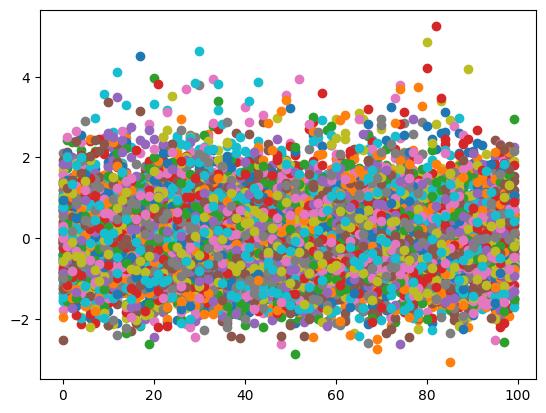

In [47]:
import matplotlib.pyplot as plt


for x in range(100):
    plt.scatter([np.arange(0,100)], norm[x, :])